In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

# Question 3

In [2]:
X = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
y = np.array([0, 0, 0, 0, 1, 1, 1])

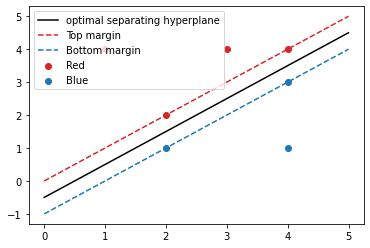

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Red', c='tab:red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Blue', c='tab:blue')
plt.plot([0, 5], [-0.5, 4.5], label='optimal separating hyperplane', c='black')
plt.plot([0, 5], [0, 5], '--', label='Top margin', c='tab:red')
plt.plot([0, 5], [-1, 4], '--', label='Bottom margin', c='tab:blue')
plt.legend()
plt.show()

The optimal hyperplane is $y=x-0.5$ or rather $0.5 - x_1 + x_2 = 0$.

The classification rule is classify to red if $0.5 - x_1 + x_2 > 0$ and to blue otherwise.

#### Drawing the margins

#### Showing the support vectors

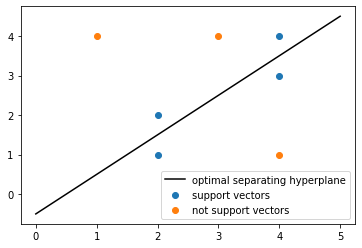

In [4]:
sv = np.array([0, 1, 1, 0, 1, 1, 0])
plt.scatter(X[sv == 1, 0], X[sv == 1, 1], label='support vectors')
plt.scatter(X[sv == 0, 0], X[sv == 0, 1], label='not support vectors')
plt.plot([0, 5], [-0.5, 4.5], label='optimal separating hyperplane', c='black')
plt.legend()
plt.show()

The $7^{th}$ sample is $(4,1)$, it is not a support vector, and therefore it does not affect the seperating hyperplane.

#### Drawing a non optimal separator

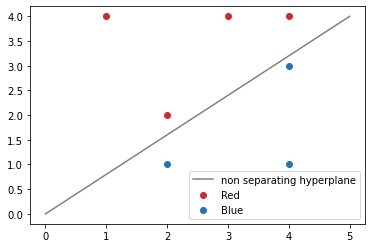

In [5]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Red', c='tab:red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Blue', c='tab:blue')
plt.plot([0, 5], [0, 4], label='non separating hyperplane', c='grey')
plt.legend()
plt.show()

This seperator's equation is $\frac{4}{5}x_1 - x_2 = 0$.

#### Making the dataset non-separable

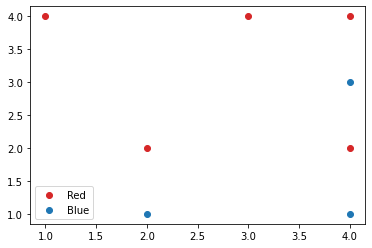

In [6]:
X = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1], [4, 2]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 0])

plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Red', c='tab:red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Blue', c='tab:blue')
plt.legend()
plt.show()

# Question 6

#### Generating the dataset

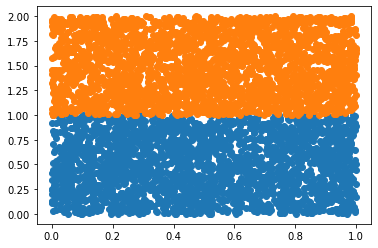

In [137]:
def generate_data(n):
    X = np.random.uniform(0, 1, n * 2).reshape(-1, 2)
    X[n // 2:, 1] += 1 - 1e-15
    y = np.zeros(n)
    y[n // 2:] = 1
    return X, y

X, y = generate_data(5000)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

#### Cross validation

C=1e-02 train score 99.38% test score 99.32%
C=1e-01 train score 99.61% test score 99.62%
C=1e+00 train score 99.63% test score 99.62%
C=1e+01 train score 99.79% test score 99.74%
C=1e+02 train score 99.96% test score 99.96%


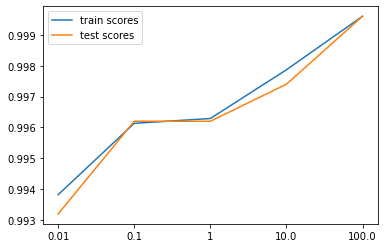

In [138]:
test_scores = []
train_scores = []
C= [1e-2, 1e-1, 1, 1e1, 1e2]

for c in C:
    clf = SVC(kernel='linear', C=c, random_state=42)
    scores = cross_validate(clf, X, y, cv=10, return_train_score=True)
    train_scores.append(scores['train_score'].mean())
    test_scores.append(scores['test_score'].mean())
    print('C={:.0e} train score {:.2%} test score {:.2%}'
          .format(c, scores['train_score'].mean(), scores['test_score'].mean()))

plt.title('Cross Validation Scores')
plt.plot(train_scores, label='train scores')
plt.plot(test_scores, label='test scores')
plt.xlabel('SVC Cost')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(len(C)), C)
plt.show()

Test and train error are in general, correlated for cross validation, this contradicts the question's claim, that lower cost values improve test accuracy when the data is barely linearly separable but hurts train accuracy.

C=1e-02 train score 99.34% test score 99.30%
C=1e-01 train score 99.68% test score 99.60%
C=1e+00 train score 99.70% test score 99.60%
C=1e+01 train score 99.82% test score 99.80%
C=1e+02 train score 99.96% test score 100.00%


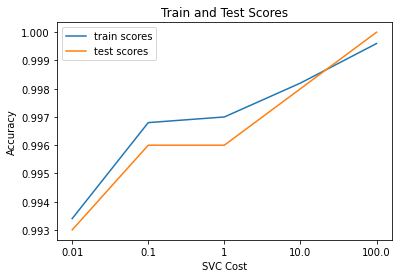

In [141]:
X_test, y_test = generate_data(1000)
test_scores = []
train_scores = []

for c in C:
    clf = SVC(kernel='linear', C=c, random_state=42).fit(X, y)
    train_score = clf.score(X, y)
    test_score = clf.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print('C={:.0e} train score {:.2%} test score {:.2%}'
          .format(c, train_score, test_score))

plt.title('Train and Test Scores')
plt.plot(train_scores, label='train scores')
plt.plot(test_scores, label='test scores')
plt.xlabel('SVC Cost')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(len(C)), C)
plt.show()

These scores are similar to the cross validation score. This makes sense, as cross validation estimates test performance.